In [1]:
push!(LOAD_PATH, pwd())

using SpinBodies, MBTrees;

┌ Info: Precompiling SpinBodies [top-level]
└ @ Base loading.jl:1260
┌ Info: Precompiling MBTrees [top-level]
└ @ Base loading.jl:1260


In [2]:
using PyPlot

In [3]:
const steps = 1e6
const frameskip = 1

const N = 5
const T = 0.01;

In [4]:
init_lattice = SpinLattice(N, T);

In [5]:
function animate_comparison()
    lattice1 = copy(init_lattice)
    lattice2 = copy(init_lattice)
    lattice3 = copy(init_lattice)
    
    tree1 = build_tree(lattice2)
    tree2 = build_tree(lattice3)

    fig, axs = PyPlot.subplots(1,3)

    for step = 1:steps
        metropolis_step!(lattice1)
        freeman_step!(lattice2, tree1)
        freeman_step_fast!(lattice3, tree2)
        if step % frameskip == 0
            vis1 = visualize(lattice1)
            vis2 = visualize(lattice2)
            vis3 = visualize(lattice3)
            axs[1].cla()
            axs[1].matshow(vis1)
            axs[2].cla()
            axs[2].matshow(vis2)
            axs[3].cla()
            axs[3].matshow(vis3)
            display(fig)
            PyPlot.pause(0.001)
            IJulia.clear_output(true)
        end
    end
end

animate_comparison (generic function with 1 method)

In [6]:
function animate_freeman()
    lattice = copy(init_lattice)
    tree = build_tree(lattice)
    fig, ax = PyPlot.subplots()
    for step = 1:steps
        freeman_step!(lattice, tree)
        if step % frameskip == 0
            vis = visualize(lattice)
            ax.cla()
            ax.matshow(vis)
            IJulia.clear_output(true)
            display(fig)
            PyPlot.pause(0.0001)
        end
    end
end

animate_freeman (generic function with 1 method)

In [7]:
function freeman()
    lattice = copy(init_lattice)
    tree = build_tree(lattice)
    for step = 1:steps
        freeman_step!(lattice, tree)
    end
    update_lattice!(lattice)
    println(lattice.M)
end

freeman (generic function with 1 method)

In [8]:
function animate_freeman_fast()
    lattice = copy(init_lattice)
    tree = build_tree(lattice)

    fig, ax = PyPlot.subplots()

    for step = 1:steps
        freeman_step_fast!(lattice, tree)
        if step % frameskip == 0
            vis = visualize(lattice)
            ax.cla()
            ax.matshow(vis)
            IJulia.clear_output(true)
            display(fig)
            PyPlot.pause(0.0001)
        end
    end
end

animate_freeman_fast (generic function with 1 method)

In [9]:
function freeman_fast()
    lattice = copy(init_lattice)
    tree = build_tree(lattice)
    for step = 1:steps
        freeman_step_fast!(lattice, tree)
    end
    update_lattice!(lattice)
    println(lattice.M)
end

freeman_fast (generic function with 1 method)

In [10]:
function animate_metropolis()
    lattice = copy(init_lattice)
    fig, ax = PyPlot.subplots()

    for step = 1:steps
        metropolis_step!(lattice)
        if step % frameskip == 0
            vis = visualize(lattice)
            ax.cla()
            ax.matshow(vis)
            IJulia.clear_output(true)
            display(fig)
            PyPlot.pause(0.0001)
        end
    end
end

animate_metropolis (generic function with 1 method)

In [11]:
function metropolis()
    lattice = copy(init_lattice)
    for step = 1:steps
        metropolis_step!(lattice)
    end
    update_lattice!(lattice)
    println(lattice.M)
end

metropolis (generic function with 1 method)

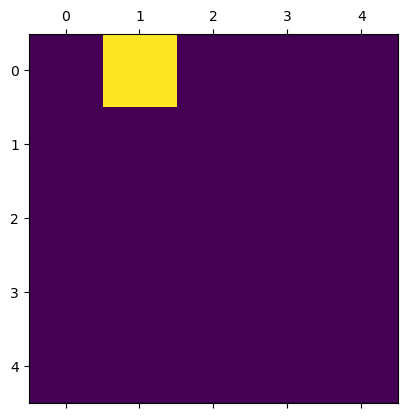

InterruptException: InterruptException:

In [68]:
animate_metropolis()

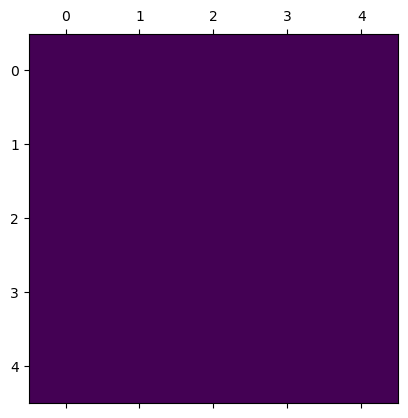

InterruptException: InterruptException:

In [69]:
animate_freeman()

In [58]:
animate_comparison()

InterruptException: InterruptException:

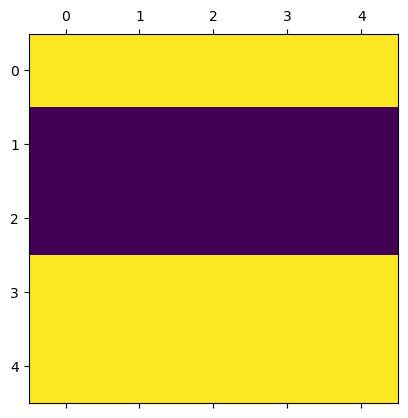

In [ ]:
animate_freeman_fast()

In [ ]:
@time freeman()

In [ ]:
@time freeman_fast()